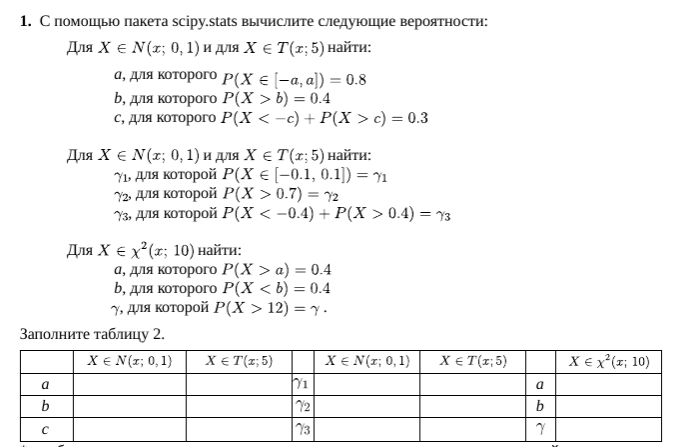

In [6]:
from io import TextIOWrapper
import zipfile
import pandas as pd

weather_zip = "daily_weather_data.zip"
with zipfile.ZipFile(weather_zip) as z:
    with z.open("daily_weather_data.csv") as f:
        weather_df = pd.read_csv(
            TextIOWrapper(f, encoding="latin-1"), sep=",", engine="python", header=0,
        )

weather_df

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El AaiÃºn,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El AaiÃºn,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El AaiÃºn,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El AaiÃºn,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


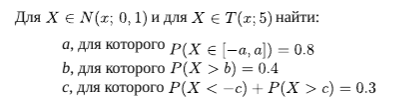

In [ ]:
from scipy import stats

# 1. Распределения
norm_dist = stats.norm(0, 1)
student_dist = stats.t(df=5)
chi2_dist = stats.chi2(df=10)

# 2. Поиск a, b, c
# a: P(-a < X < a) = 0.8 => левый хвост 0.1, значит ppf(0.9)
a_n, a_t = norm_dist.ppf(0.9), student_dist.ppf(0.9)

# b: P(X > b) = 0.4 => ppf(0.6)
b_n, b_t = norm_dist.ppf(0.6), student_dist.ppf(0.6)

# c: P(X < -c) + P(X > c) = 0.3 => один хвост 0.15, значит ppf(0.85)
c_n, c_t = norm_dist.ppf(0.85), student_dist.ppf(0.85)

# 3. Поиск вероятностей gamma
gamma1_n = norm_dist.cdf(0.1) - norm_dist.cdf(-0.1)
gamma1_t = student_dist.cdf(0.1) - student_dist.cdf(-0.1)

gamma2_n = norm_dist.sf(0.7)
gamma2_t = student_dist.sf(0.7)

gamma3_n = 2 * norm_dist.cdf(-0.4)
gamma3_t = 2 * student_dist.cdf(-0.4)

# 4. Хи-квадрат
a_chi = chi2_dist.ppf(0.6)  # P(X > a) = 0.4
b_chi = chi2_dist.ppf(0.4)  # P(X < b) = 0.4
gamma_chi = chi2_dist.sf(12)  # P(X > 12)

print(f"Результаты Задания 1 готовы.")

'a_norm: 1.2815515655446004, a_student 1.4758840488558216'